In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(X_scaled)

# Print cluster labels
print("Cluster labels:")
print(labels)

Cluster labels:
[-1  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  1  2
 -1 -1  1  2  2  3  1  1  1  3  2  1  3  2  3 -1  3  2  1  3  2  2  3  1
  3  3  3  2  1 -1  2  1  3 -1  3  1  2  1  3  2 -1  1  4  2  1 -1 -1  2
  1  2  1  2  2  1  4  2  1  2  4  1  4  4  4  2 -1  2  2  2  4  1  1  1
  2 -1 -1 -1 -1  5 -1 -1 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5
 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5 -1  5
 -1 -1 -1  5 -1  5 -1  5 -1 -1 -1  5 -1  5 -1  5 -1 -1 -1 -1 -1  5 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


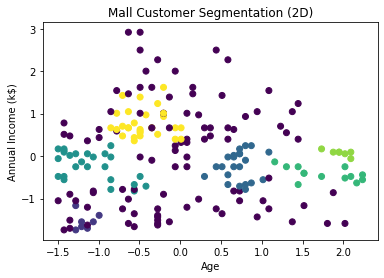

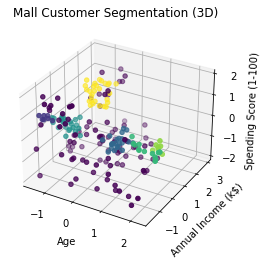

In [4]:
# Visualize the clusters in 2D
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Mall Customer Segmentation (2D)')
plt.show()

# Visualize the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Mall Customer Segmentation (3D)')
plt.show()

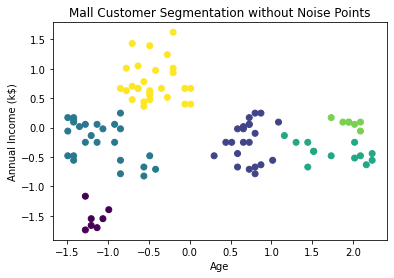

In [5]:
# Identify and remove noise points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
noise_mask = labels == -1
cleaned_labels = labels[~noise_mask]

# Visualize the clusters after removing noise points
plt.scatter(X_scaled[~noise_mask, 0], X_scaled[~noise_mask, 1], c=cleaned_labels)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Mall Customer Segmentation without Noise Points')
plt.show()

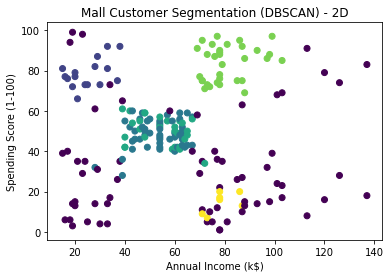

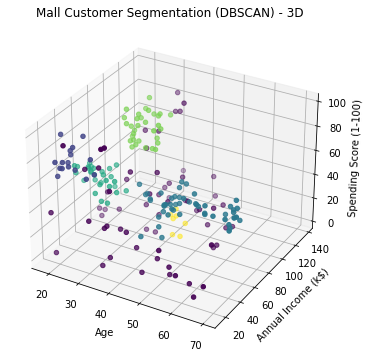

Cluster labels:
[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0  1 -1 -1  0 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0  1  2  1 -1  1  2
  2  2  1  2  2  1  1  1  1  1  2  1  1  2  1  1  1  2  1  1  2  2  1  1
  1  1  1  2  1  1  2  1  1  1  1  1  2  1  1  2 -1  1  1  2  1  1  2  2
  1  2  1  2  2  1  1  2  1  2  1  1  1  1  1  2  1  2  2  2  1  1  1  1
  2 -1 -1  3 -1  3 -1  3 -1  3  4  3  2  3 -1  3  4  3 -1  3 -1  3 -1  3
 -1  3 -1  3 -1  3  4  3  4  3  4  3 -1  3 -1  3 -1  3 -1  3 -1  3  4  3
 -1 -1  4  3 -1  3 -1  3 -1  3 -1  3 -1  3 -1  3 -1  3 -1 -1 -1  3 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


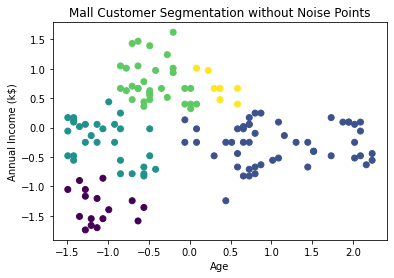

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('mall_customers.csv')
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=6)
clusters = dbscan.fit_predict(X_scaled)

# Visualize the clusters in 2D
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation (DBSCAN) - 2D')
plt.show()

# Visualize the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation (DBSCAN) - 3D')
plt.show()
labels = dbscan.fit_predict(X_scaled)

# Print cluster labels
print("Cluster labels:")
print(clusters)
# Identify and remove noise points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
noise_mask = labels == -1
cleaned_labels = labels[~noise_mask]

# Visualize the clusters after removing noise points
plt.scatter(X_scaled[~noise_mask, 0], X_scaled[~noise_mask, 1], c=cleaned_labels)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Mall Customer Segmentation without Noise Points')
plt.show()